In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

bug_df = pd.read_csv('My_Requests_12_12_2022_10_30.csv', index_col='Key', parse_dates=['Created', 'Updated'])
bug_df['Created'] = bug_df['Created'].dt.date
bug_df['Updated'] = bug_df['Updated'].dt.date
bug_df = bug_df.sort_values(by=('Priority'), ascending=True)

#convert date column to datetime and subtract one week
bug_df['Created'] = pd.to_datetime(bug_df['Created']) - pd.to_timedelta(7, unit='d')

#calculate sum of values, grouped by week
bug_df_week = bug_df.groupby([pd.Grouper(key='Created', freq='W')]).count()

bug_df_week.head(60)

Plot for Count of Bugs by Creation Date

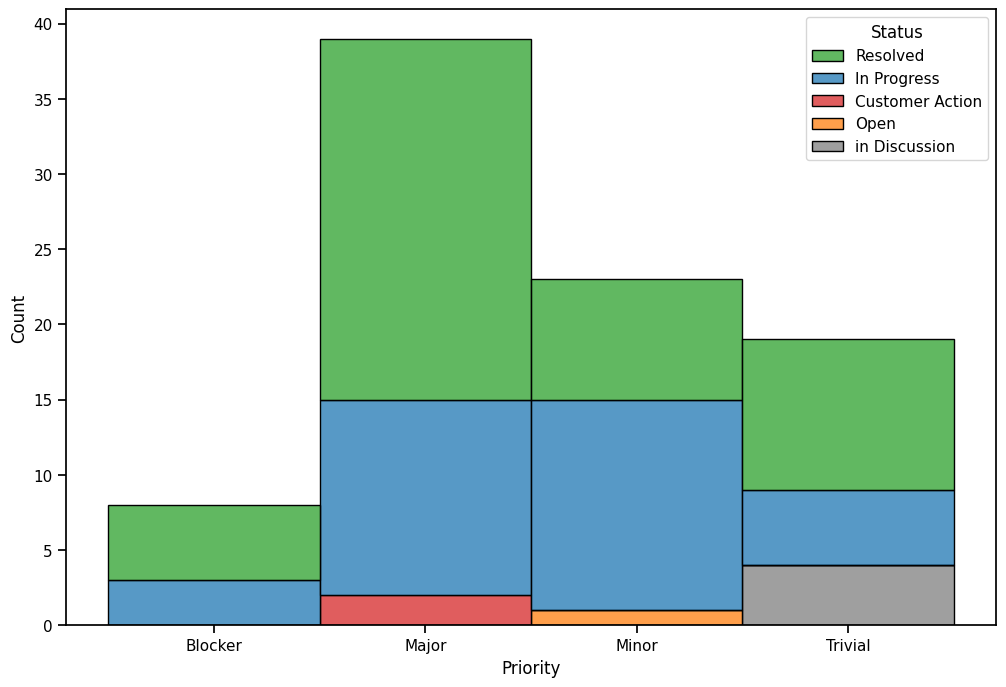

In [14]:
bug_df.sort_values(by='Status', ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
palette = {'Customer Action':'tab:red','In Progress':'tab:blue', 'Open':'tab:orange', 'Resolved':'tab:green', 'in Discussion':'tab:grey'}
sns.set_context('notebook')
sns.histplot(data=bug_df, x='Priority', hue='Status', multiple='stack', palette=palette)
plt.savefig(fname='Count_By_Priority')

Count by Priority

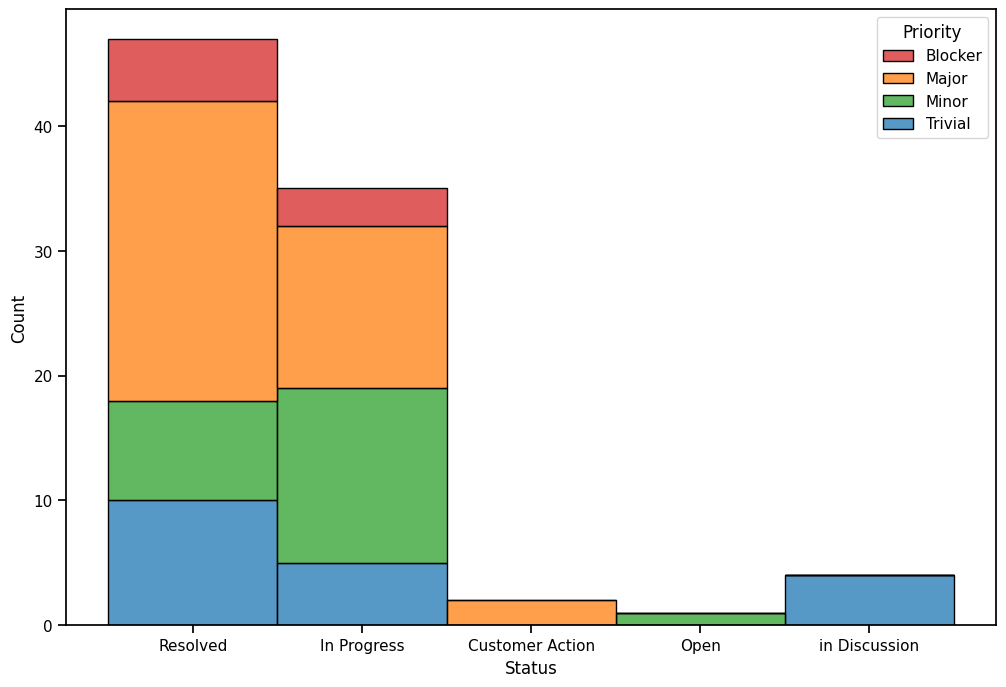

In [15]:
bug_df.sort_values(by='Priority', ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
palette = {'Blocker':'tab:red', 'Major':'tab:orange', 'Minor':'tab:green', 'Trivial':'tab:blue'}
sns.set_context('notebook')
sns.histplot(data=bug_df, x='Status', hue='Priority', multiple='stack', palette=palette)
plt.savefig(fname='Count_By_Status')

In [37]:
bug_df_count = bug_df.groupby('Created').count()
bug_df_count['Adj_Sum'] = bug_df_count['Type'] - bug_df_count['Resolution']
bug_df_cumsum = bug_df_count.cumsum() 
#bug_df_count.head()
bug_df_cumsum.head()


,Type,Reporter,Summary,Status,Priority,Resolution,Updated,Assignee,Adj_Sum
Created,,,,,,,,,
2022-11-10,16,16,16,16,16,9,16,16,7
2022-11-11,22,22,22,22,22,13,22,22,9
2022-11-14,23,23,23,23,23,13,23,23,10
2022-11-15,25,25,25,25,25,14,25,25,11
2022-11-16,29,29,29,29,29,17,29,29,12


In [34]:

bug_df_count_upd = bug_df.groupby('Updated').count()
bug_df_count_upd['Res_Sum'] = bug_df_count_upd['Resolution']
bug_df_cumsum_res = bug_df_count_upd.cumsum()
bug_df_cumsum_res.head()


,Type,Reporter,Created,Summary,Status,Priority,Resolution,Assignee,Res_Sum
Updated,,,,,,,,,
2022-11-10,1,1,1,1,1,1,1,1,1
2022-11-11,2,2,2,2,2,2,2,2,2
2022-11-16,3,3,3,3,3,3,2,3,2
2022-11-17,8,8,8,8,8,8,4,8,4
2022-11-20,9,9,9,9,9,9,4,9,4


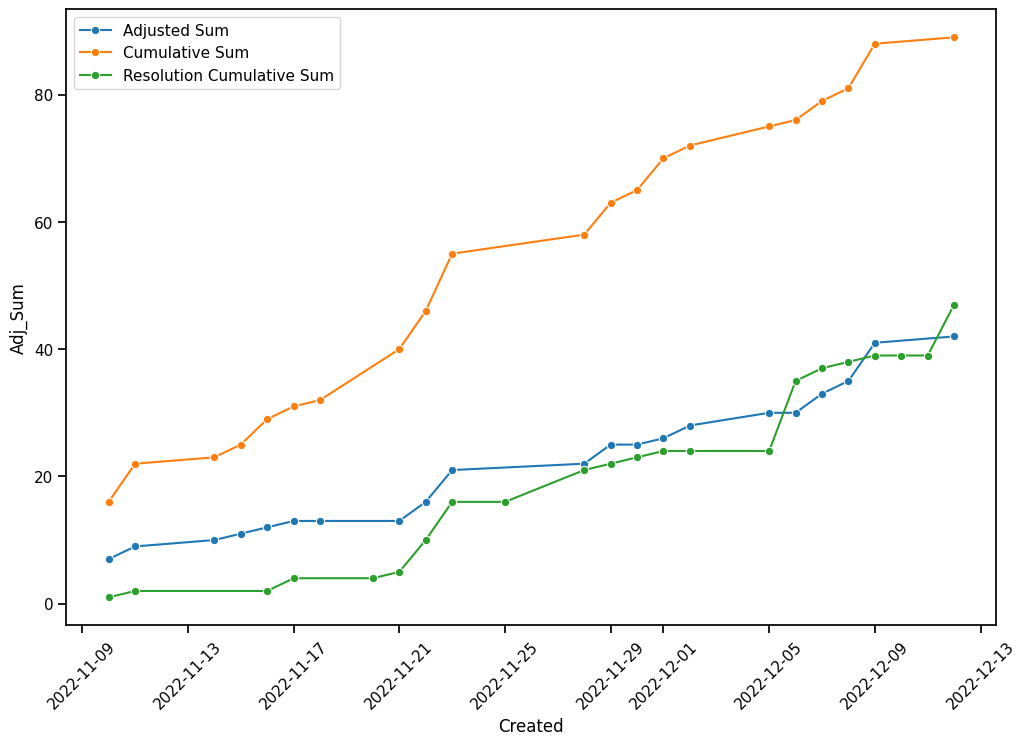

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
bug_cumsum_adj = sns.lineplot(data=bug_df_cumsum, x='Created', y='Adj_Sum', marker='o', legend=True, label='Adjusted Sum')
bug_cum_sum = sns.lineplot(data=bug_df_cumsum, x='Created', y='Type', marker='o', legend=True, label='Cumulative Sum')
bug_cumsum_res = sns.lineplot(data=bug_df_cumsum_res, x='Updated', y='Res_Sum', marker='o', legend=True, label='Resolution Cumulative Sum')
plt.xticks(rotation=45)
plt.savefig(fname='Cumsum_Total_vs_Resolved')

Cumulative Sum of Total Bugs (Adjusted for Resolved bugs) and Cumulative Sum of Resolved Bugs